<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement
##### Are there significant differences in SAT and ACT participation rates among different regions of years 2017-2019?

### Contents:

### Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Datasets

#### Preprovide Data

* [`act_2017.csv`](../data/act_2017.csv): 2017 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2018.csv`](../data/act_2018.csv): 2018 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2019.csv`](../data/act_2019.csv): 2019 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`sat_2017.csv`](../data/sat_2017.csv): 2017 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2018.csv`](../data/sat_2018.csv): 2018 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2019.csv`](../data/sat_2019.csv): 2019 SAT Scores by State ([source](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent))
ent))

#### External Data

* [`us_state_region.csv`](../data/us_state_region.csv): Census Regions and Divisions of the United States ([source](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf))

### Code Implementation

#### Import Modules

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Loading Data

In [14]:
sat17_df = pd.read_csv('../data/sat_2017.csv')
sat18_df = pd.read_csv('../data/sat_2018.csv')
sat19_df = pd.read_csv('../data/sat_2019.csv')
act17_df = pd.read_csv('../data/act_2017.csv')
act18_df = pd.read_csv('../data/act_2018.csv')
act19_df = pd.read_csv('../data/act_2019.csv')
state_region_df = pd.read_csv('../data/us_state_region.csv')

sat17_df['Year'] = 2017
sat17_df['Type'] = 'SAT'
sat18_df['Year'] = 2018
sat18_df['Type'] = 'SAT'
sat19_df['Year'] = 2019
sat19_df['Type'] = 'SAT'

act17_df['Year'] = 2017
act17_df['Type'] = 'ACT'
act18_df['Year'] = 2018
act18_df['Type'] = 'ACT'
act19_df['Year'] = 2019
act19_df['Type'] = 'ACT'


exam_df = pd.concat([sat17_df, sat18_df, sat19_df, act17_df, act18_df, act19_df], ignore_index=True)

### Data Exploration

In [16]:
# review sample data
for year, type in [[2017, 'SAT'], [2018, 'SAT'], [2019, 'SAT'], [2017, 'ACT'], [2018, 'ACT'], [2019, 'ACT']]:
    print(f"Year:{year}, Type:{type} Shape:{exam_df[(exam_df['Year']==year) & (exam_df['Type']==type)].shape}")
    print("* Review Sample Data")
    print(exam_df[(exam_df['Year']==year) & (exam_df['Type']==type)].head(5))
    print("\n* Review NULL Data")
    print(exam_df[(exam_df['Year']==year) & (exam_df['Type']==type)].isna().sum())
    print("\n* Review data type")
    print(exam_df[(exam_df['Year']==year) & (exam_df['Type']==type)].dtypes)
    print('-' * 80, '\n')

Year:2017, Type:SAT Shape:(51, 13)
* Review Sample Data
        State Participation  Evidence-Based Reading and Writing   Math  \
0     Alabama            5%                               593.0  572.0   
1      Alaska           38%                               547.0  533.0   
2     Arizona           30%                               563.0  553.0   
3    Arkansas            3%                               614.0  594.0   
4  California           53%                               531.0  524.0   

    Total  Year Type Participation Rate  EBRW  English  Reading  Science  \
0  1165.0  2017  SAT                NaN   NaN      NaN      NaN      NaN   
1  1080.0  2017  SAT                NaN   NaN      NaN      NaN      NaN   
2  1116.0  2017  SAT                NaN   NaN      NaN      NaN      NaN   
3  1208.0  2017  SAT                NaN   NaN      NaN      NaN      NaN   
4  1055.0  2017  SAT                NaN   NaN      NaN      NaN      NaN   

  Composite  
0       NaN  
1       NaN  


### Cleaning Data

In [19]:
# SAT 2019 has difference column name, EBRW vs. Evidence-Based Reading and Writing
sat19_df.rename(columns={'EBRW': 'Evidence-Based Reading and Writing', 'Participation Rate': 'Participation'}, inplace=True)

# re-combine rename dataframe
exam_df = pd.concat([sat17_df, sat18_df, sat19_df, act17_df, act18_df, act19_df], ignore_index=True)
exam_df['Participation'] = pd.to_numeric(exam_df['Participation'].str.replace(r'—|%','', regex=True), errors='coerce')

# recheck null Participation
exam_df[exam_df['Participation'].isnull()]
exam_df['Participation'].isnull().sum()

# since it only 2 rows, we decide to drop these rows
exam_df = exam_df[~exam_df['Participation'].isna()]

# remove duplicated rows
exam_df = exam_df[~exam_df.duplicated(['State', 'Type', 'Year'])]

# mapping state with region
exam_df = exam_df.merge(state_region_df)

#### Formatting Data

In [21]:
# review summarize data
exam_df.groupby(['Year','Type','Region'])['Participation'].describe()

count       mean        std   min    25%    50%     75%  \
Year Type Region                                                               
2017 ACT  Midwest     12.0  77.833333  24.349102  29.0  71.50   82.0   98.50   
          Northeast    9.0  24.888889   8.237786   8.0  21.00   29.0   31.00   
          South       17.0  73.470588  31.965054  18.0  45.00  100.0  100.00   
          West        13.0  70.846154  29.042630  29.0  40.00   66.0  100.00   
     SAT  Midwest     12.0  17.250000  31.177279   2.0   3.00    3.0    9.75   
          Northeast    9.0  77.777778  15.114379  60.0  67.00   71.0   95.00   
          South       17.0  40.176471  36.435277   2.0   5.00   49.0   65.00   
          West        13.0  33.846154  27.257556   3.0  11.00   30.0   53.00   
2018 ACT  Midwest     12.0  75.833333  29.151121  22.0  61.75   87.5  100.00   
          Northeast    9.0  21.222222   7.446103   7.0  16.00   24.0   26.00   
          South       16.0  75.062500  31.718488  17.0  51.00  100.0  100.00   
          West        13.0  62.615385  31.821215  24.0  33.00   66.0  100.00   
     SAT  Midwest     12.0  25.500000  38.587563   2.0   3.00    4.0   29.25   
          Northeast    9.0  85.222222  13.330208  64.0  79.00   82.0   97.00   
          South       17.0  41.117647  34.667857   3.0   6.00   52.0   68.00   
          West        13.0  43.153846  33.155809   3.0  16.00   43.0   60.00   
2019 ACT  Midwest     12.0  72.416667  29.583344  19.0  58.25   78.5   97.00   
          Northeast    9.0  17.666667   6.020797   6.0  14.00   20.0   22.00   
          South       17.0  68.411765  33.706562  13.0  39.00   78.0  100.00   
          West        13.0  61.615385  32.076831  23.0  31.00   63.0  100.00   
     SAT  Midwest     12.0  25.916667  39.016217   2.0   3.00    4.0   30.75   
          Northeast    9.0  85.777778  13.169831  66.0  79.00   82.0   99.00   
          South       17.0  50.294118  39.164341   3.0   7.00   68.0   82.00   
          West        13.0  43.384615  33.402940   3.0  18.00   41.0   63.00   

                       max  
Year Type Region            
2017 ACT  Midwest    100.0  
          Northeast   34.0  
          South      100.0  
          West       100.0  
     SAT  Midwest    100.0  
          Northeast  100.0  
          South      100.0  
          West        93.0  
2018 ACT  Midwest    100.0  
          Northeast   31.0  
          South      100.0  
          West       100.0  
     SAT  Midwest    100.0  
          Northeast  100.0  
          South      100.0  
          West       100.0  
2019 ACT  Midwest    100.0  
          Northeast   25.0  
          South      100.0  
          West       100.0  
     SAT  Midwest    100.0  
          Northeast  100.0  
          South      100.0  
          West       100.0

In [22]:
# calculate median value for each region

# group by year, type and region
year_type_region_par_median = exam_df.groupby(['Year','Type','Region'])['Participation'].median().reset_index()
# group by type and region
type_region_par_median = exam_df.groupby(['Type','Region'])['Participation'].median().reset_index()

In [23]:
# checking for statistically significant
def test_stat_significant(group_act, group_sat):
    t_stat, p_value = stats.ttest_ind(group_act, group_sat)
    print(f"T-statistic:{t_stat:.4}, P-value:{p_value:.4}")
    if p_value < 0.05:
        print("The difference between groups ACT and SAT is statistically significant.")
    else:
        print("The difference between groups ACT and SAT is not statistically significant.")

# checking for predominant test name
def test_predominant(group_act, group_sat):
    group_act_median = group_act.median()
    group_sat_median = group_sat.median()
    if group_act_median > group_sat_median:
        dominate_type = 'ACT'
    elif group_act_median < group_sat_median:
        dominate_type = 'SAT'
    else:
        dominate_type = 'NO'
    print(f"{region} region {'predominant by ' + dominate_type if dominate_type != 'NO' else 'no predominant'} participation.")

# examining trends in testing for changes
def test_testing_trend(group_act, group_sat):
    act_trend = np.mean(np.gradient(group_act))
    sat_trend = np.mean(np.gradient(group_sat))
    if act_trend > 0:
        print('Overall participation in the ACT is increasing.')
    if act_trend < 0:
        print('Overall participation in the ACT is decreasing.')
    else:
        print('Overall participation in the ACT is not changing.')
    if sat_trend > 0:
        print('Overall participation in the SAT is increasing.')
    elif sat_trend < 0:
        print('Overall participation in the SAT is decreasing.')
    else:
        print('Overall participation in the SAT is not changing.')

for region in exam_df['Region'].unique():
    group_act = year_type_region_par_median[(year_type_region_par_median['Type'] == 'ACT') & (year_type_region_par_median['Region'] == region)]['Participation']
    group_sat = year_type_region_par_median[(year_type_region_par_median['Type'] == 'SAT') & (year_type_region_par_median['Region'] == region)]['Participation']

    test_predominant(group_act, group_sat)
    test_testing_trend(group_act, group_sat)
    test_stat_significant(group_act, group_sat)
    print('-' * 40)

South region predominant by ACT participation.
Overall participation in the ACT is decreasing.
Overall participation in the SAT is increasing.
T-statistic:3.861, P-value:0.01813
The difference between groups ACT and SAT is statistically significant.
----------------------------------------
West region predominant by ACT participation.
Overall participation in the ACT is decreasing.
Overall participation in the SAT is increasing.
T-statistic:6.485, P-value:0.002915
The difference between groups ACT and SAT is statistically significant.
----------------------------------------
Northeast region predominant by SAT participation.
Overall participation in the ACT is decreasing.
Overall participation in the SAT is increasing.
T-statistic:-12.01, P-value:0.0002757
The difference between groups ACT and SAT is statistically significant.
----------------------------------------
Midwest region predominant by ACT participation.
Overall participation in the ACT is decreasing.
Overall participation i

#### Visualization

##### Participation Rate per Region

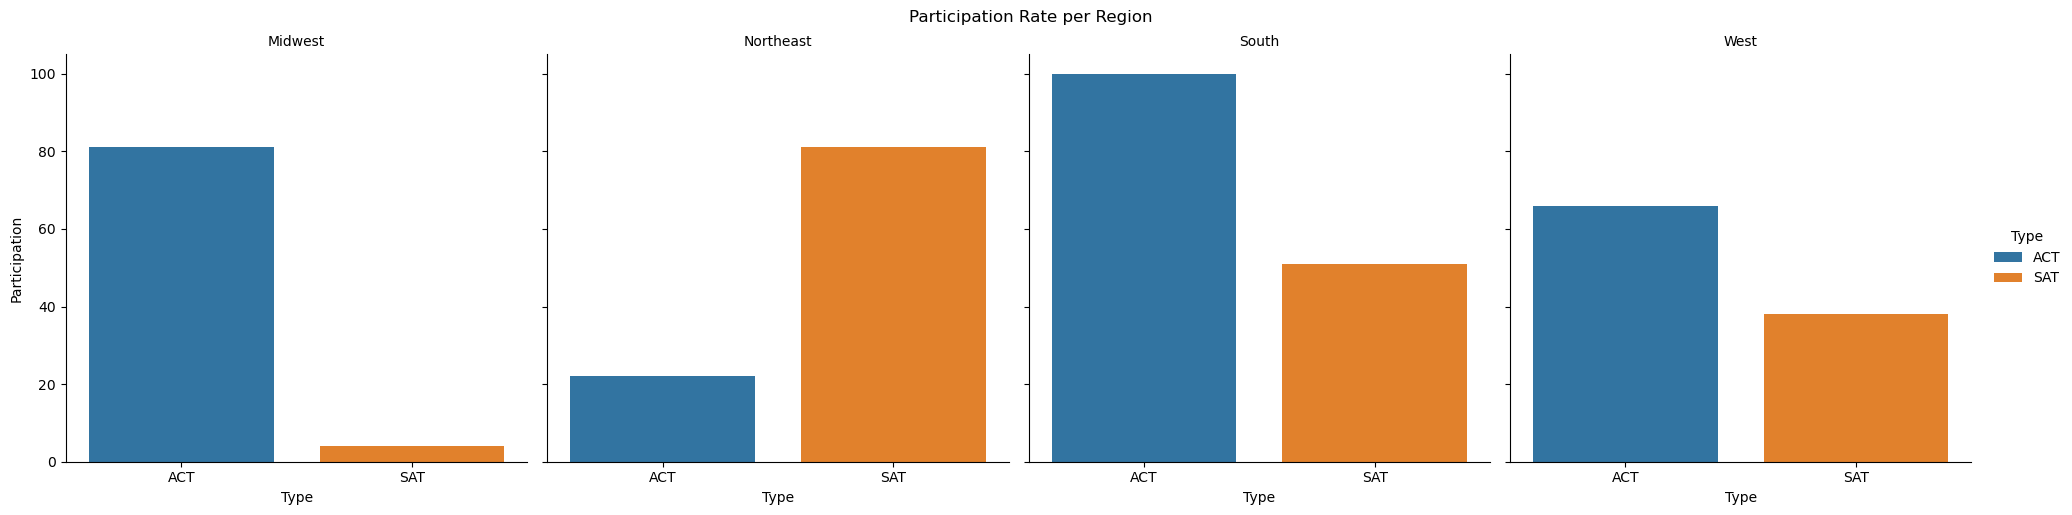

In [26]:
# layout 1 x 4
grp = sns.catplot(type_region_par_median, x='Type', y='Participation', col='Region', \
                  hue='Type', kind='bar', errorbar=None, legend='full', col_wrap=4)
grp.set_titles('{col_name}')
grp.fig.suptitle('Participation Rate per Region', y=1.02)
grp.fig.savefig('../figure/participation_per_region.png', dpi=300);

# layout 2 x 2
# grp = sns.catplot(type_region_par_median, x='Type', y='Participation', col='Region', \
#                   hue='Type', kind='bar', errorbar=None, legend='full', col_wrap=2)
# grp.set_titles('{col_name}')
# grp.fig.suptitle('Participation Rate per Region', y=1.02)
# grp.fig.savefig('../figure/participation_per_region.png', dpi=300);

##### Participation Rate Trend per Region

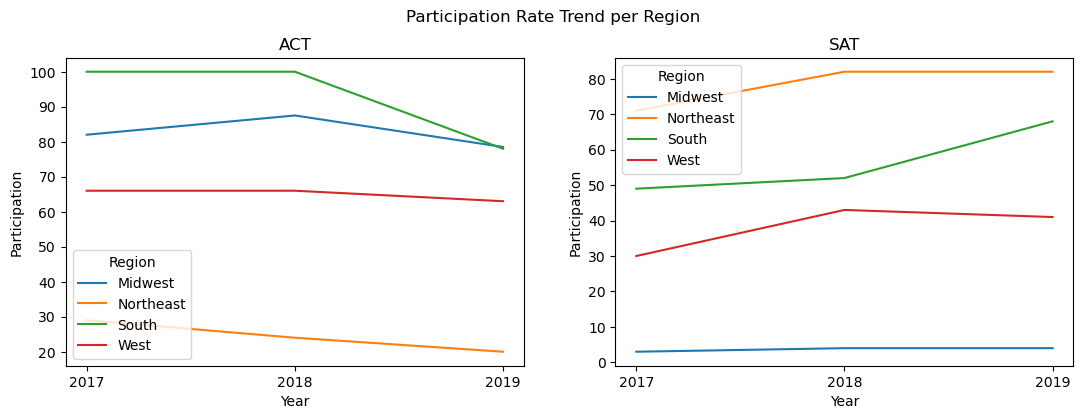

In [28]:
# create subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# plot ACT participation rate trend
g1 = sns.lineplot(year_type_region_par_median[year_type_region_par_median['Type'] == 'ACT'], \
                x='Year', y='Participation', hue='Region', errorbar=None, ax=axes[0])
g1.set_title('ACT')
g1.set_xticks(range(2017, 2020))

# plot SAT participation rate trend
g2 = sns.lineplot(year_type_region_par_median[year_type_region_par_median['Type'] == 'SAT'], \
                  x='Year', y='Participation', hue='Region', errorbar=None, ax=axes[1])
g2.set_title('SAT')
g2.set_xticks(range(2017, 2020))

fig.suptitle('Participation Rate Trend per Region', y=1);
fig.savefig('../figure/participation_trend_per_region.png', dpi=300);

### Finding

* Students from the Midwest, South, and West regions mainly participate in the ACT rather than the SAT. However, students in the Northeast region tend to prefer the SAT.* 
SAT participation among students increased from 2017 to 2019, while ACT participation declined during the same period.


### Recommendation

The SAT has gained popularity over the ACT, particularly in the Northeast. However, its dominance is less pronounced in the Midwest. To increase participation rates in the Midwest, efforts could be made to make the SAT more accessible to students in the region.
